## Main Project - (Entertainment Domain)

                            Movie Recommendation System

###### Importing relevant libraries :

In [1]:
import numpy as np
import pandas as pd,datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import ast

import warnings 
warnings.filterwarnings("ignore")

##### Reading the dataset into Python Environment :

In [2]:
# Using movies metadataset 

dataset = pd.read_csv("movies_metadata.csv")

dataset.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


##### Checking the basic details of the dataset :

In [3]:
### Displaying information about the dataframe including the index,dtype and columns, non-null values and memory usages.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
## Generating a sample random of row or column.

dataset.sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
13952,False,NaN,38000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.thetruthisntpretty.com/,20943,tt1142988,en,The Ugly Truth,A romantically challenged morning show produce...,...,2009-07-24,205298907.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The battle of the sexes is on.,The Ugly Truth,False,6.4,1005.0
22254,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...",NaN,256750,tt0082998,hr,Ritam zločina,Old houses in Zagreb are destroyed in order to...,...,1981-01-01,0.0,89.0,"[{'iso_639_1': 'hr', 'name': 'Hrvatski'}]",Released,NaN,The Rhythm of Crime,False,4.8,4.0
31808,False,NaN,0,[],NaN,326013,tt0090345,ru,Я тебя помню,A dying woman’s wish sends her son on a train ...,...,1986-09-08,0.0,90.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,I Remember You,False,3.0,2.0
36750,False,NaN,0,[],NaN,350765,tt0074770,en,Langsamer Sommer,A man visits a friend's house. They watch a fi...,...,1976-01-01,0.0,84.0,[],Released,NaN,Langsamer Sommer,False,5.0,3.0
1018,False,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,11412,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",...,1996-10-11,89456761.0,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,False,6.4,323.0
22388,False,NaN,1800000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,211233,tt2088871,fi,Kaappari,Aarno Lamminparras hijacked an airplane with a...,...,2013-01-17,532269.0,93.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,NaN,The Hijack That Went South,False,5.6,8.0
6919,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",NaN,29845,tt0072417,en,A Woman Under the Influence,"Mabel, a mother and wife, is on the brink of i...",...,1974-09-19,0.0,155.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,A Woman Under the Influence,False,7.8,87.0
15986,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,74896,tt0062990,en,The Fox,Two women who live a quiet life on a farm in r...,...,1967-12-13,0.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Between Ellen and Jill came Paul...,The Fox,False,7.8,5.0
31751,False,NaN,20000000,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",http://darkplacesmovie.com/,182560,tt2402101,en,Dark Places,A woman who survived the brutal killing of her...,...,2015-03-31,208588.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"In 1985, her entire family was murdered. 30 ye...",Dark Places,False,5.7,488.0
1813,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",http://www.sonyclassics.com/whatever/whatever....,102304,tt0140688,en,Whatever,A teen faces her impending adulthood in the ca...,...,1998-07-10,0.0,112.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"1981. In an era of just say no, they said yes.",Whatever,False,8.3,2.0


In [5]:
## dtypes returns the data types of the columns.

dataset.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [6]:
# Shape of the dataset, i.e displaying number of rows and columns

print("Shape of the dataset is ",dataset.shape)

print('The total number of movies are',dataset.shape[0])

Shape of the dataset is  (45466, 24)
The total number of movies are 45466


In [7]:
# To find the size of the dataset

dataset.size

1091184

In [8]:
# To display the columns

dataset.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [9]:
## nunique() returns the series with number of distinct observations over requested axis.

dataset.nunique()

adult                        5
belongs_to_collection     1698
budget                    1226
genres                    4069
homepage                  7673
id                       45436
imdb_id                  45417
original_language           92
original_title           43373
overview                 44307
popularity               44176
poster_path              45024
production_companies     22708
production_countries      2393
release_date             17336
revenue                   6863
runtime                    353
spoken_languages          1931
status                       6
tagline                  20283
title                    42277
video                        2
vote_average                92
vote_count                1820
dtype: int64

### EDA

##### 1. Univariate Analysis :-




##### Analysis of Movies based on Producion Countries :-
     From the dataset analysis, most of the films are in English langage i.e. more than 31000 films which are shot in various locations around the world. It would be interesting to know the most popular destinations for the filmmakers to shoot their films.

In [10]:
dataset['production_countries'] = dataset['production_countries'].fillna('[]').apply(ast.literal_eval)
dataset['production_countries'] = dataset['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [11]:
s = dataset.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [12]:
con_dif = dataset.drop('production_countries', axis=1).join(s)
con_dif = pd.DataFrame(con_dif['countries'].value_counts())
con_dif['country'] = con_dif.index
con_dif.columns = ['num_movies', 'country']
con_dif = con_dif.reset_index().drop('index', axis=1)
con_dif.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


The United States is the most popular destination of production for movies given in our dataset. Second production country is the Europe accompanied by France, Germany and Italy in the top 5. Japan and India are the most popular Asian countries when it comes to movie production.

##### Movie Analysis based on Production Companies :-


###### To find out the highest earning production companies

In [13]:
dataset['production_companies'] = dataset['production_companies'].fillna('[]').apply(ast.literal_eval)
dataset['production_companies'] = dataset['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [14]:
s = dataset.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [15]:
com_dif = dataset.drop('production_companies', axis=1).join(s)

In [16]:
com_sum = pd.DataFrame(com_dif.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_dif.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_dif.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

In [17]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
companies,,,
Warner Bros.,6.352519e+10,5.082015e+07,1250
Universal Pictures,5.525919e+10,6.657734e+07,830
Paramount Pictures,4.880819e+10,4.866221e+07,1003
Twentieth Century Fox Film Corporation,4.768775e+10,5.704276e+07,836
Walt Disney Pictures,4.083727e+10,1.552748e+08,263
Columbia Pictures,3.227974e+10,7.489498e+07,431
New Line Cinema,2.217339e+10,8.004834e+07,277
Amblin Entertainment,1.734372e+10,2.282068e+08,76
DreamWorks SKG,1.547575e+10,1.629027e+08,95


##### Most Successful Production Companies : -

In [18]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
companies,,,
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
WingNut Films,7.111004e+09,4.444378e+08,16
Heyday Films,7.920012e+09,4.400007e+08,18
Twentieth Century Fox Animation,5.572269e+09,3.714846e+08,15
Marvel Studios,1.169964e+10,3.656136e+08,32
Lucasfilm,9.898421e+09,3.413249e+08,29
Jerry Bruckheimer Films,8.957441e+09,3.317571e+08,27
Marvel Enterprises,6.538067e+09,3.269034e+08,20
Legendary Pictures,1.346866e+10,3.206825e+08,42


###### Movie Analysis based on languages :

In [19]:
dataset['original_language'].drop_duplicates().shape[0]

93

Ploting the number of movies made based on their languages.

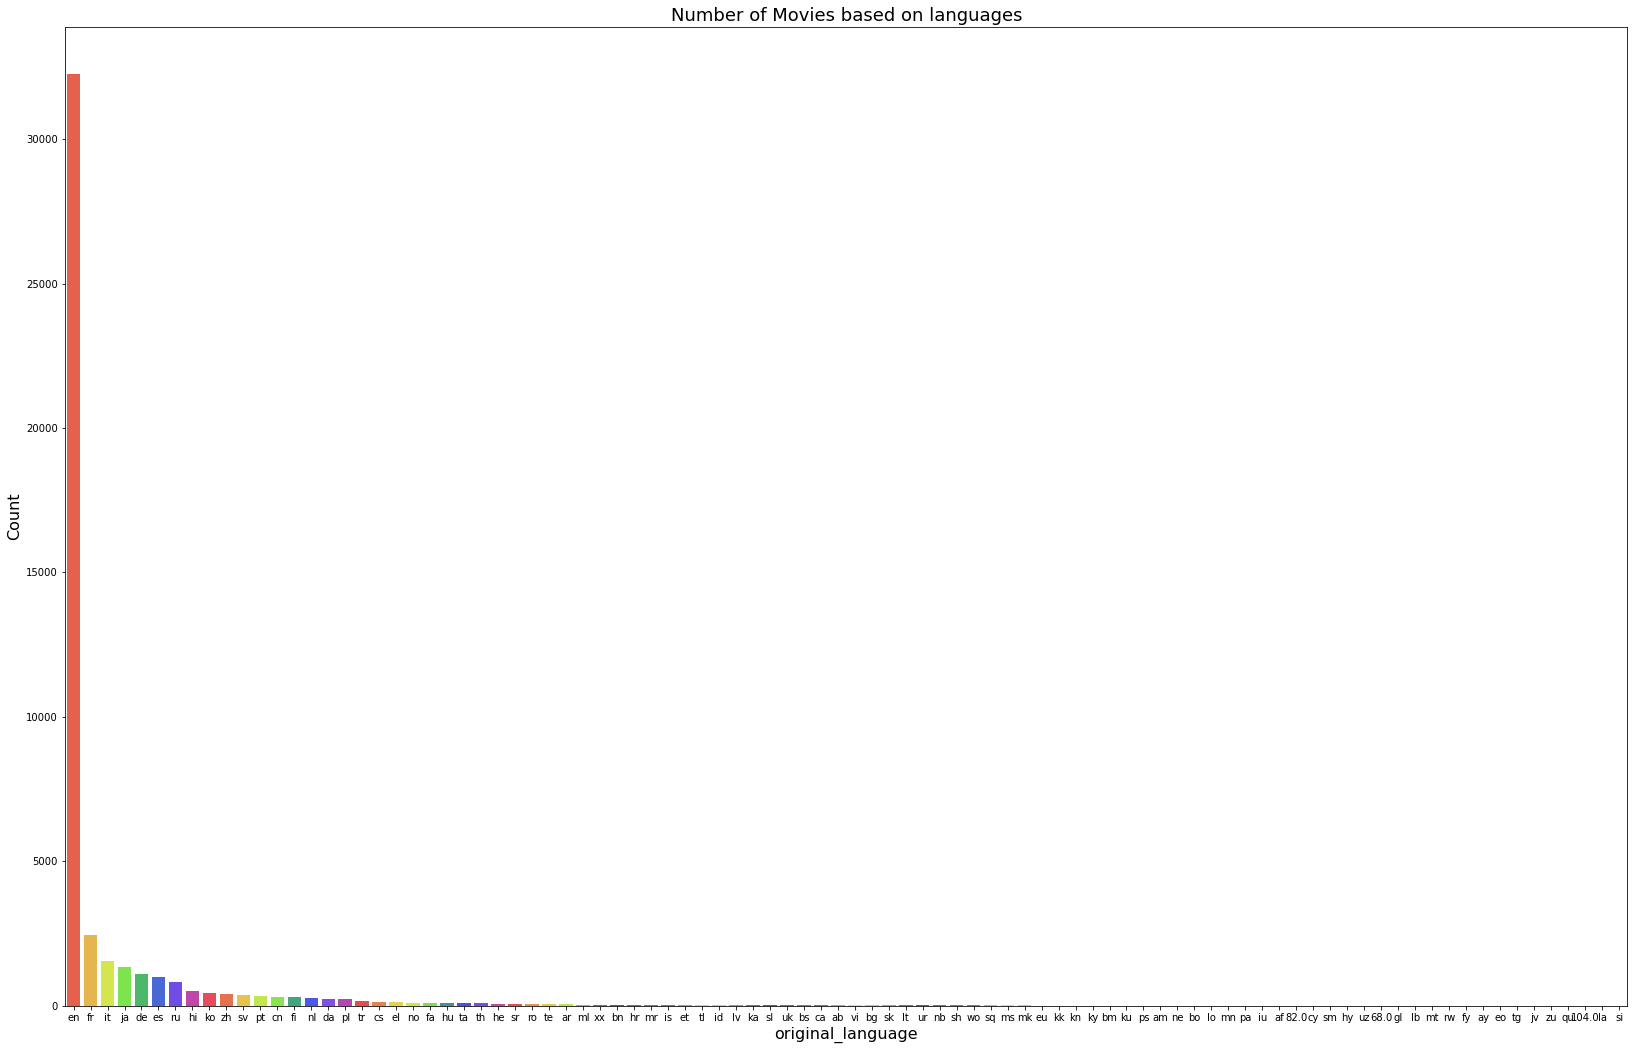

In [20]:
count = dataset['original_language'].value_counts()
plt.figure(figsize=(28,18))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=16)
plt.xlabel('original_language', fontsize=16)
plt.title('Number of Movies based on languages', fontsize = 18)
plt.show()

##### Ploting the graph of float variables in the dataset like revenue, runtime, vote_average and vote_count of the movies.

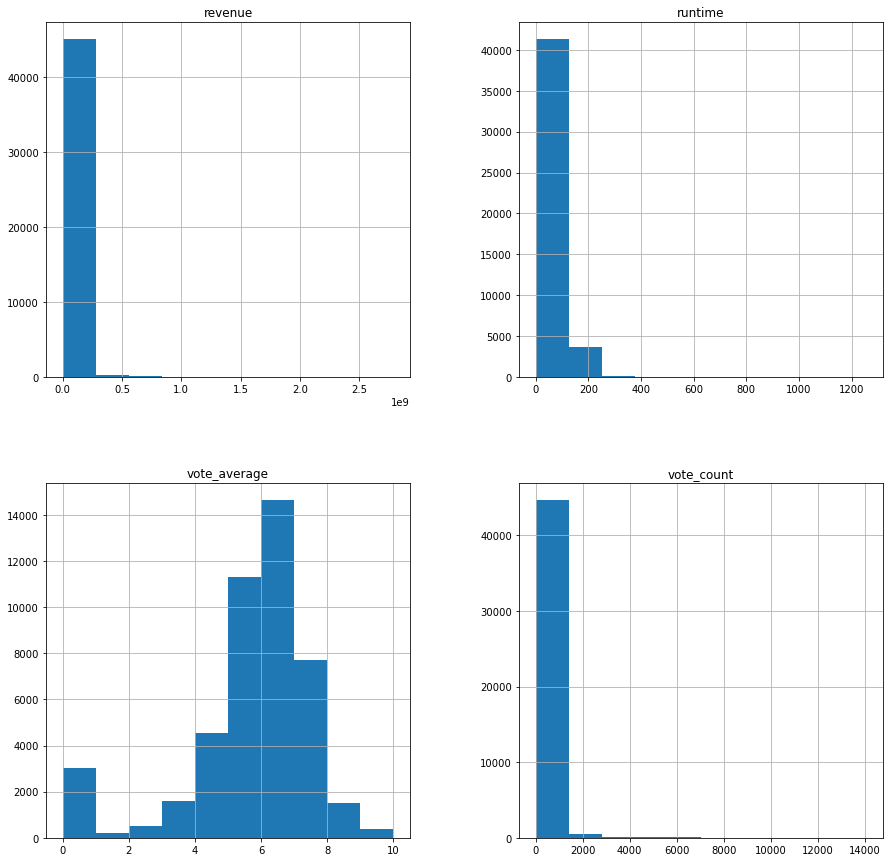

In [21]:
freqgraph=dataset.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,15))
plt.show()

#### 2. Bivariate Analysis :-

##### Ploting the movies based on their revenues.

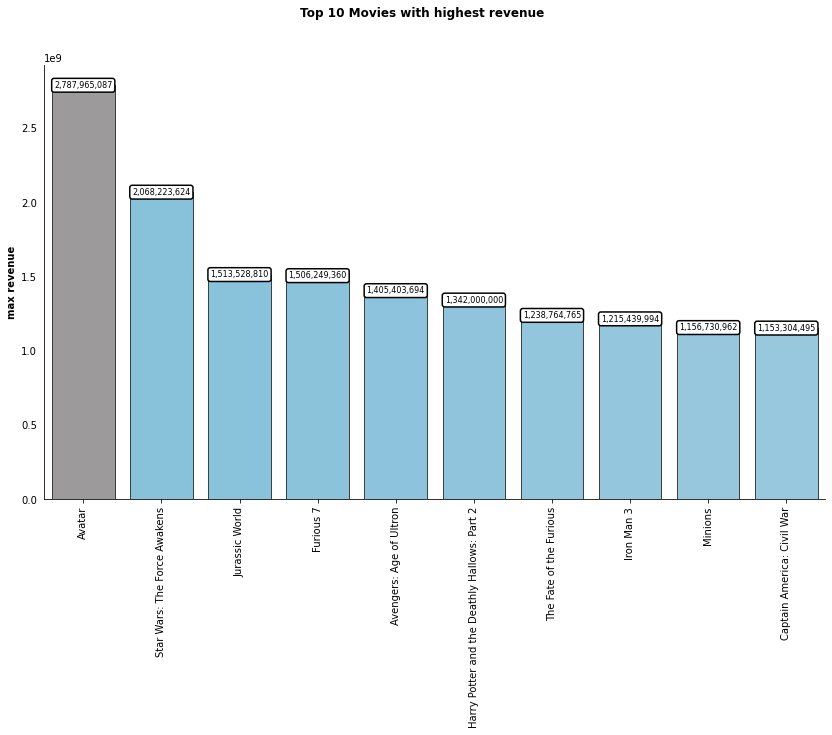

In [22]:
fig = plt.figure(figsize=(14,8))
gs = fig.add_gridspec(1,1)

pal = sns.light_palette('#79c6e8', reverse=True, n_colors=50)
pal.insert(0,'#9c9a9a')

cars = dataset.groupby('original_title')['revenue'].mean().sort_values(ascending=False).head(10)
color = ['skyblue' for i in range(15)]
color[0] = 'red'
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=10, rotation=90)
ax.tick_params(axis='y', labelsize=10, left=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel='max revenue', fontsize=10, weight='bold')
for p in ax.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+38
    ax.text(x=x, y=y, s=value, fontsize=8, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=1.5))
    
fig.suptitle(t='Top 10 Movies with highest revenue', fontsize=12, weight='bold')
sns.despine()
plt.show()

In [23]:
# Creating a feature 'year' column with datetime object for each movie.

dataset['year'] = pd.to_datetime(dataset['release_date'], errors='coerce').apply(lambda x: x.year)

In [24]:
dataset.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0


##### Finding the Most Voted Movies

In [25]:
dataset[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010.0
12481,The Dark Knight,12269.0,2008.0
14551,Avatar,12114.0,2009.0
17818,The Avengers,12000.0,2012.0
26564,Deadpool,11444.0,2016.0
22879,Interstellar,11187.0,2014.0
20051,Django Unchained,10297.0,2012.0
23753,Guardians of the Galaxy,10014.0,2014.0
2843,Fight Club,9678.0,1999.0
18244,The Hunger Games,9634.0,2012.0


###### Movie Analysis based on Release dates: Year /Month

<AxesSubplot:title={'center':'Movies Produced '}, xlabel='year', ylabel='Count'>

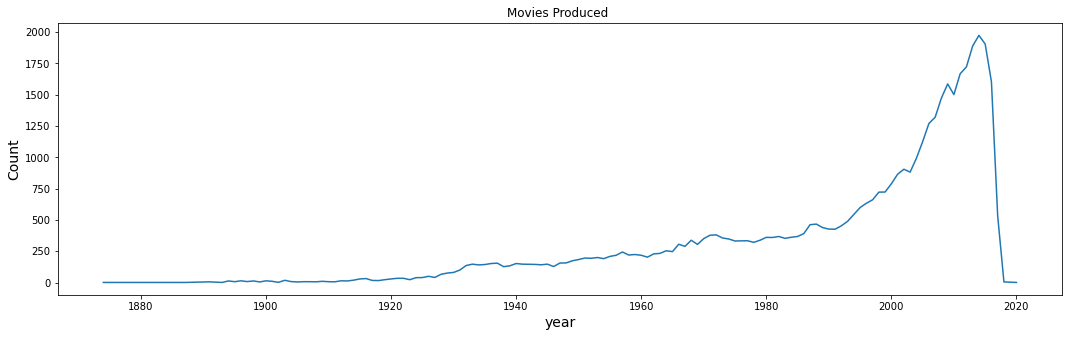

In [26]:
year_count = dataset.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
plt.ylabel('Count', fontsize=14)
plt.xlabel('Released Year', fontsize=14)
plt.title('Movies Produced ')
year_count.plot()

In [27]:
#Finding the released date in terms of years, months and days of the week.

monthwise = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
daywise = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [28]:
def get_month(x):
    try:
        return monthwise[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [29]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return daywise[answer]
    except:
        return np.nan

In [30]:
# Adding the features month and day

dataset['day'] = dataset['release_date'].apply(get_day)
dataset['month'] = dataset['release_date'].apply(get_month)

In [31]:
##### Ploting most successful/popular months of movie releasing :-

<AxesSubplot:title={'center':'Number of Movies released in a particular month.'}, xlabel='month', ylabel='count'>

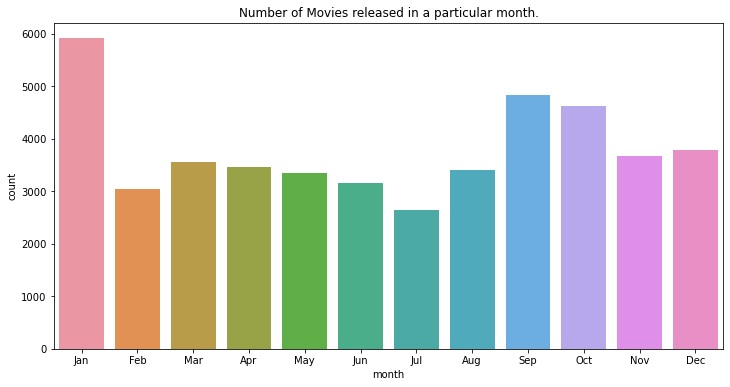

In [32]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=dataset, order=monthwise)

#### Finding the films with more than 10 spoken languages

In [33]:
dataset[dataset['spoken_languages'] >= 10][['title', 'year', 'spoken_languages']].sort_values('spoken_languages', ascending=False)

TypeError: '>=' not supported between instances of 'str' and 'int'

  The movie "Vision of Europe" has the highest number of spoken languages of 19 which shows the diversity of the movie in terms of languages.

In [ ]:
dataset['genres'].head()

In [ ]:
dataset.dtypes

#### Ploting the movies based on the genre :-

In [ ]:
dataset['genres'] = dataset['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
s = dataset.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [ ]:
gen_dif = dataset.drop('genres', axis=1).join(s)

In [ ]:
gen_dif['genre'].value_counts().shape[0]

In [ ]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.title("Top Movies based on Genres")
plt.show()

dataset = dataset.groupby("revenue")['runtime'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale = 1.2)
plt.figure(figsize = [10,7])
sns.barplot(data = dataset, x=  'revenue', y = 'runtime',palette = 'GnBu_r')
plt.ylabel('Percent of baseline')

In [ ]:
corrmatrix=dataset.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmin=-0.2,vmax=0.8,linewidth=0.2,cmap='Blues')

The movies with highest revenue has the highest correlation with vote_count, so we can assume that movies with highest revenues have the highest votecounts. 


In [ ]:
dataset.adult.value_counts()

######  Plot a graph which showing the no of movies release in a specific year

dataset.release_date.value_counts(dropna=False).sort_index().plot(kind="barh",figsize=(15,16))
plt.show()

####   Necessary Preprocessing steps to be done :-

1. Checking the Null/Missing values in the dataset :

In [34]:
dataset.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         0
production_countries         0
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
year                        90
day                      45466
month                       90
dtype: int64

There are so many missing values in the dataset. 
   So we need to fill the null values first by replacing them with some values of their own using fillna(), replace() or by  interpolate() like functions.

In [35]:
dataset.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
year                     float64
day                      float64
month                     object
dtype: object

#### Filling the Null values :-